# <center>Assignment 7</center>
## <center>Author: Claudio Díaz García</center>

**<center>Advanced Statistics</center>**
**<center>MSc in Bioinformatics for Health Sciences (UPF-UB)</center>**

In [234]:
# Import libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pymc3 as pm
import scipy.stats as st
from math import sqrt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# Set graphs to appear in the same window
%matplotlib inline
# Set seaborn style
sns.set(style="darkgrid", font_scale=1.5)

### 1) Describe the data set.

After having a look at the provided link, we load the Iris dataset, as follows. This function stores a `Bunch` dictionary-like object (a sklearn specific object type) in the `data` variable. When we check this object, we notice a `DESCR` attribute with useful information about the data.

In [176]:
data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In summary, the Iris dataset contains 150 measurements of 3 different types of irises (*Setosa*, *Versicolor*, and *Virginica*). The actual measurements are stored as a `numpy.ndarray`, in the `data` attribute. The corresponding variables for each column in the array are stored in the `feature_names` attribute. Therefore, we can store it in a pandas dataframe and explore the data with the `describe` method.

In [177]:
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By looking at the table above, we can see that the dataset has got 150 observations for each of the four variables or features (there are not missing data). These variables are the length and the width of the sepals and petals of the flowers, expressed in centimeters (cm). The mean and the standard deviation suggest that the data are reasonably centered around the mean, although we should plot the values to have a visual confirmation of the distributions shape.

Next, we look further into each of the variable types, using the `dtypes` method.

In [178]:
iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Therefore, the features in the dataset have the following characteristics:

1. **Sepal length**: Measurement in centimeters of the sepal length. This is a quantitative variable, with float type (i.e. it includes decimal numbers). The values range from 4.3 cm to 7.9 cm (range = 3.6 cm), with a mean of 5.8 cm and a median of 5.8 cm.
2. **Sepal width**: Measurement in centimeters of the sepal width. This is a quantitative variable, with float type. The values range from 2 cm to 4.4 cm (range = 2.4 cm), with a mean of 3.1 cm and a median of 3 cm.
3. **Petal length**: Measurement in centimeters of the petal length. This is a quantitative variable, with float type. The values range from 1 cm to 6.9 cm (range = 5.9 cm), with a mean of 3.8 cm and a median of 4.4 cm. In this case, the difference between the mean and the median may suggest some skewing on the data.
4. **Petal width**: Measurement in centimeters of the petal width. This is a quantitative variable, with float type. The values range from 0.1 cm to 2.5 cm (range = 2.4 cm), with a mean of 0.8 cm and a median of 1.3 cm. In this case, there may also be some skewing on the data.

Finally, to have a visual taste of the data, we plot a histogram and a boxplot for each of the variables. The dashed lines show the mean for each distribution.

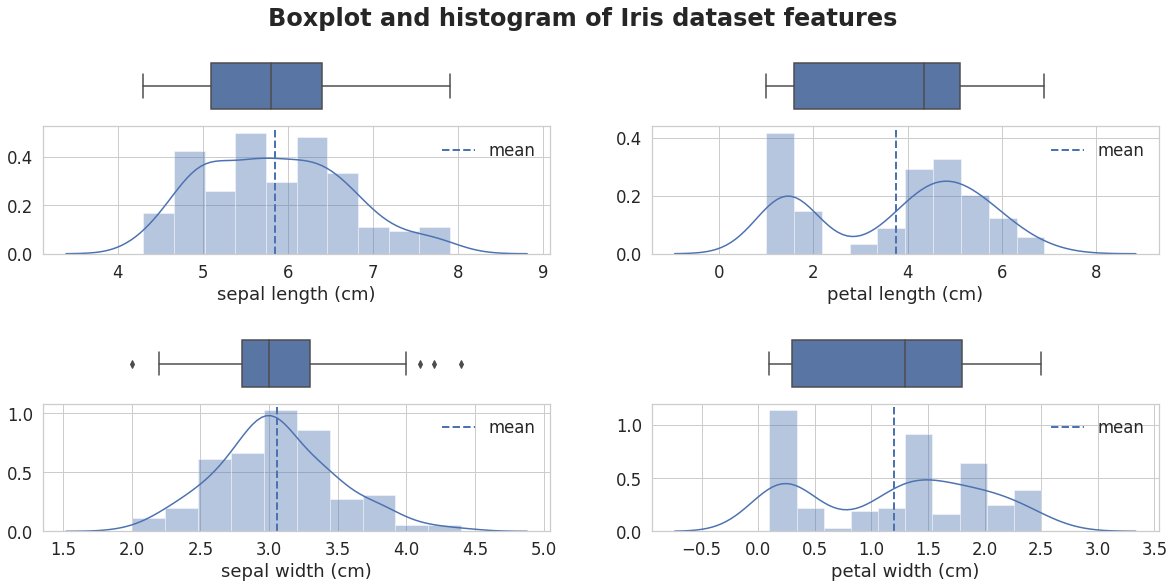

In [213]:
# Create figure
fig = plt.figure(figsize=(20, 10))
# Divide plotting area in a 8x2 grid
gs = GridSpec(8, 2, figure = fig)

# Sepal length plot
# Create histogram
hist_seplen = fig.add_subplot(gs[1:3, 0])
sns.distplot(iris["sepal length (cm)"], bins=10, ax=hist_seplen)
# Add mean value dashed line
hist_seplen.axvline(iris["sepal length (cm)"].mean(), linewidth=2,
                   linestyle="--", label="mean")
hist_seplen.legend(loc="best", frameon=False)
# Create boxplot
box_seplen = fig.add_subplot(gs[0, 0], sharex=hist_seplen)
sns.boxplot(iris["sepal length (cm)"], ax=box_seplen)
# Remove axis
box_seplen.axis("off")

# Sepal widht plot
hist_sepwid = fig.add_subplot(gs[5:7, 0])
sns.distplot(iris["sepal width (cm)"], bins=10, ax=hist_sepwid)
hist_sepwid.axvline(iris["sepal width (cm)"].mean(), linewidth=2,
                   linestyle="--", label="mean")
hist_sepwid.legend(loc="best", frameon=False)
box_sepwid = fig.add_subplot(gs[4, 0], sharex=hist_sepwid)
sns.boxplot(iris["sepal width (cm)"], ax=box_sepwid)
box_sepwid.axis("off")

# Petal length plot
hist_petlen = fig.add_subplot(gs[1:3, 1])
sns.distplot(iris["petal length (cm)"], bins=10, ax=hist_petlen)
hist_petlen.axvline(iris["petal length (cm)"].mean(), linewidth=2,
                   linestyle="--", label="mean")
hist_petlen.legend(loc="best", frameon=False)
box_petlen = fig.add_subplot(gs[0, 1], sharex=hist_petlen)
sns.boxplot(iris["petal length (cm)"], ax=box_petlen)
box_petlen.axis("off")

# Petal width plot
hist_petwid = fig.add_subplot(gs[5:7, 1])
sns.distplot(iris["petal width (cm)"], bins=10, ax=hist_petwid)
hist_petwid.axvline(iris["petal width (cm)"].mean(), linewidth=2,
                   linestyle="--", label="mean")
hist_petwid.legend(loc="best", frameon=False)
box_petwid = fig.add_subplot(gs[4, 1], sharex=hist_petwid)
sns.boxplot(iris["petal width (cm)"], ax=box_petwid)
box_petwid.axis("off")

# Write title on top
fig.suptitle("Boxplot and histogram of Iris dataset features",
             fontsize=24, fontweight="bold", y=0.95)
plt.show()

From these plots, we can claim that sepal features are both close to follow a normal distribution. There are not a lot of outliers and the data are rather clean. However, the petal features are rather untidy. We can see that petal length follows a bimodal distribution, with a lot of values between 1 and 2, while the rest of the data are normally distributed. The petal width also has a bimodal distribution, with a lot of values between 0 and 0.5, but in this case the rest of the measurements do not seem to follow any specific distribution. Overall, we could suspect that petal features reflect the presence of two different groups in the dataset and sepal fetaures show a single homogeneous group.

Regarding the observations, if we check the `target` attribute, we have the information about the class (type of iris) for each measurement. The matching class for the classification labels can be accessed in the `target_names` attribute.

In [180]:
print(data.target)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


By default, the `target_names` and `target` correspondance is in alphabetical order. Then, in this case, the labels are:

Label | Type of iris
:---: | :---:
0 | Setosa
1 | Versicolor
2 | Virginica

To have a final version of this dataset nicely stored in a dataframe with all the information, we can add the type of iris as a feature column:

In [181]:
# Create a new dataframe, but adding the target unidimensional array as column
all_iris = pd.DataFrame(data=np.c_[data["data"], data["target"]],
                        columns=data["feature_names"] + ["target"])
all_iris["target"] = all_iris["target"].astype(int)
# Create a category object and add as new column
all_iris["iris type"] = pd.Categorical.from_codes(data.target, data.target_names)
# Check beginning and end of the dataframe
all_iris.head().append(all_iris.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris type
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


To finish the description of this dataset, we can have quick look at the correlation of the four features. This is useful to have an idea of the independence of the variables. The `corr` method returns the Pearson correlation matrix for our dataframe:

In [182]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


We can write some code to get the ordered pairwise correlation coefficients:

In [183]:
corr_iris = iris.corr().abs().unstack().sort_values(ascending=False)
corr_iris

petal width (cm)   petal width (cm)     1.000000
petal length (cm)  petal length (cm)    1.000000
sepal width (cm)   sepal width (cm)     1.000000
sepal length (cm)  sepal length (cm)    1.000000
petal width (cm)   petal length (cm)    0.962865
petal length (cm)  petal width (cm)     0.962865
                   sepal length (cm)    0.871754
sepal length (cm)  petal length (cm)    0.871754
petal width (cm)   sepal length (cm)    0.817941
sepal length (cm)  petal width (cm)     0.817941
petal length (cm)  sepal width (cm)     0.428440
sepal width (cm)   petal length (cm)    0.428440
petal width (cm)   sepal width (cm)     0.366126
sepal width (cm)   petal width (cm)     0.366126
                   sepal length (cm)    0.117570
sepal length (cm)  sepal width (cm)     0.117570
dtype: float64

We can see that the following pairs of variables are highly correlated (correlation coefficient > 0.8):

- Petal width and petal length.
- Petal length and sepal length.
- Petal width and sepal length.

We may drop some of them to avoid redundancy in our data, but a deeper analysis on predictiveness (how much a feature is able to predict the category of the data) should be performed first.

The least correlated variables are sepal length and sepal width. These features could be essential to perform classification in our data, as they are able to discriminate among the measurements, as we can see in this scatter plot:

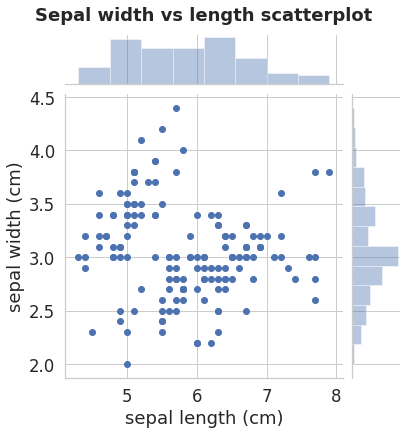

In [214]:
sns.jointplot(iris["sepal length (cm)"], iris["sepal width (cm)"], kind="scatter")
plt.suptitle("Sepal width vs length scatterplot",
             fontsize=18, fontweight="bold", y=1.02)
plt.show()

We can roughly see two groups of values (on the top left corner and the  bottom right part of the graph), which may indicate the importance of these features as predictors for the class. We will look into this in the next exercises.

### 2) Using pyMC3, we want to infer the parameters of the following models:
### a) The mean and the standard deviation of the distribution of one feature chosen by you, that we assume as normally distributed.

pyMC3 is a Python library for probabilistic programming, especially using Bayesian models such as Markov Chain Monte Carlo. It contains a wide variety of probability distributions, numerical methods and functions for statistical modelling. In this exercise, it becomes very handy because of the `Model` class, which is specifically designed to build statistical models.

We choose the **sepal width** variable to calculate the parameters, as it is the closest to a normal distribution (according to the histogram in the previous exercise). If we assume that this feature is normally distributed, our model will have two parameters: the mean ($\mu$) and the standard deviation ($\sigma$).

<center>$ X = Sepal\  width\  in\  centimeters $</center>
<center>$ X $~$ N(\mu, \sigma) $</center>

Our assumptions also imply that the data in our sample are independent and identically distributed.

Before using pyMC3 to build this model, we estimate the parameters with a frequentist approach. The objective of this step is to have reference values for $\mu$ and $\sigma$ to compare with the Bayesian approach. The most widely used technique for this estimation is the **maximum likelihood** method, which consists in the maximization of the log-likelihood function. The results are:

<center>$ \hat{\mu} = \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i $</center>
<center>$ s^2 = \frac{n}{n-1}\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2 $</center>

These estimators correspond to the sample mean and the sample variance that are returned by the `mean` and `std` methods. Therefore:

In [11]:
# Get data from the chosen feature
sepwid = iris["sepal width (cm)"]
# Calculate estimators
print("X ~ N(%.3f, %.3f)" %(sepwid.mean(), sepwid.std()))

X ~ N(3.057, 0.436)


For the sake of completeness, we can also calculate the 95% confidence interval for the mean and the standard deviation using `scipy`:

In [12]:
# 95%CI for the mean
mean_ci = st.t.interval(0.95, len(sepwid) - 1, loc = sepwid.mean(), scale = sepwid.sem())
print("95%%CI for the mean: %.3f < μ < %.3f" %(mean_ci[0], mean_ci[1]))

# 95%CI for the standard deviation
n = len(sepwid)
var = sepwid.var()
df = n - 1

var_lower = (n - 1) * var / st.chi2.ppf(1 - 0.05 / 2, df)
var_upper = (n - 1) * var / st.chi2.ppf(0.05 / 2, df)

std_ci = (sqrt(var_lower), sqrt(var_upper))
print("95%%CI for the standard deviation: %.3f < σ < %.3f" %(std_ci[0], std_ci[1]))

95%CI for the mean: 2.987 < μ < 3.128
95%CI for the standard deviation: 0.391 < σ < 0.492


Now, we use pyMC3 to build the model using a **Bayesian approach**. In this case, we have decided to use prior beliefs as objective as possible, without using the available data. Therefore, we assign uniform distributions to the parameters $\mu$ and $\sigma$. For $\mu$, we know that this value cannot be negative (we are measuring a width) and we decide to set an upper bound of 1 meter, to reduce the exploration space. For $\sigma$, we know that standard deviations cannot be negative and we set an upper bound of the square root of the upper bound of the mean. Next, we feed the model with the data and run the Metropolis algorithm.

In [13]:
with pm.Model() as sepwid_model:
    # Priors for the two parameters to estimate
    mu = pm.Uniform("mu", lower=0, upper=100)
    sigma = pm.Uniform("sigma", lower=0, upper=10)
    # Observed variable (data) that follows a Normal distribution
    x = pm.Normal("x", mu=mu, sigma=sigma, observed=sepwid)
    # Draw 10000 posterior samples, after 5000 tuning samples, using the Metropolis algorithm
    trace = pm.sample(10000, tune=5000, step=pm.Metropolis())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:05<00:00, 10304.82draws/s]
The number of effective samples is smaller than 25% for some parameters.


To evaluate our results, we draw the **traceplot** and the **posterior distributions** of the parameters.

/home/cladigar/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/cladigar/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


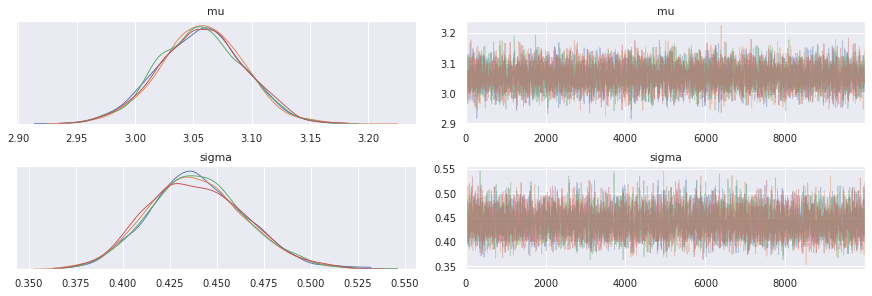

In [14]:
pm.traceplot(trace)
plt.show()

We can easily see that both parameters converged nicely and are stationary, as we do not represent in these plots the tuning samples. We also see that the mean and the standard deviation have clear maximum a posteriori values. 

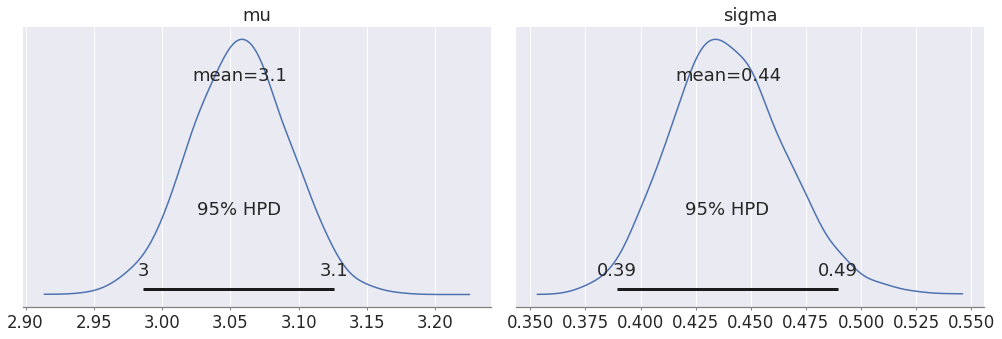

In [15]:
pm.plot_posterior(trace, credible_interval=0.95)
plt.show()

In [16]:
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,3.057,0.036,2.992,3.126,0.0,0.0,8147.0,8147.0,8148.0,8317.0,1.0
sigma,0.440,0.026,0.393,0.489,0.0,0.0,7175.0,7170.0,7194.0,8425.0,1.0


These posterior distributions show the estimated mean values for each parameter and also the 95% highest posterior density interval. **There is 95% probability that the mean for this distribution is between 3 and 3.1 and the standard deviation is between 0.39 and 0.49**. We can see in the table above the exact values and, if we compare them to the frequentist estimators, both the point estimates and the confidence intervals are almost exactly equal to the ones obtained using MCMC.  

It is worth mentioning that we could have "helped" the algorithm to start looking for values near the mean and standard deviation derived from the sample data that we have. This strategy is known as Empirical Bayes and it has both advantages and disadvantages. We have considered that, in our case, it was not necessary to use less objective priors, as the data was normally distributed and convergence was easy to achieve.  

Finally, we could have used different priors. Using the assumption that our feature is normally distributed, we could have used a normal distribution as prior for $\mu$ and a halfnormal or a gamma distribution for the variance (standard deviation).

### b) The Petal Width as linear function of the other three features.

In this case, we are trying to predict the petal widht as a linear function of the other three features in the iris dataset. In consequence, our random variable of interest is **petal width** and our regression model will have three parameters and an additional error factor:

<center>$ petwid = Petal\  width\  in\  centimeters $</center>
<center>$ petwid = \alpha · seplen + \beta · sepwid + \gamma · petlen + \epsilon$</center>

As in the previous exercise, we will first use a frequentist approach to have a reference for the values of the parameters, so we can assess the accuracy of our predictive model. The most commonly used technique for a multiple linear regression problem is a **least squares estimation** (LSE), which basically gives the parameters that minimize the sum of squares of the residuals (difference between a given observed value and its prediction).

To perform this estimation, we use the `linear_model` function from `sklearn`, as follows:

In [17]:
# Define variables for the model
## Data from the features
X = iris[["sepal length (cm)", "sepal width (cm)", "petal length (cm)"]]
## Data from the predicted variable
y = iris[["petal width (cm)"]]
# Fit model
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
# Predict
y_pred = lm.predict(X)
# Output parameters, Pearson's correlation coefficient and mean squared error
print("Coefficients:\nα = %.3f (seplen)\nβ = %.3f (sepwid)\nγ = %.3f (petlen)\nIntercept = %.3f\n" %(lm.coef_[0, 0],lm.coef_[0, 1],lm.coef_[0, 2], lm.intercept_))
print("R2 = %.3f\n" %(lm.score(X, y)))
print("Mean squared error = %.3f" %(mean_squared_error(y, y_pred)))

Coefficients:
α = -0.207 (seplen)
β = 0.223 (sepwid)
γ = 0.524 (petlen)
Intercept = -0.240

R2 = 0.938

Mean squared error = 0.036


Confidence intervals can be built for these parameters, but as they are not commonly used in linear regression evaluation, we did not calculate them (they are useful for hypothesis testing, though). Also, plotting the variables is usually a good practice, but due to the multiple features we are fitting in the model, this is not graphically possible.

Now, we move to the **Bayesian modelling** using pyMC3. We apply the concept of hierarchical modelling, which means specifying the model in different layers or stages. In our case, the first layer would be the data random variables (seplen, sepwid, petlen), the second layer would be the coefficients for the linear regression and the last layer would be the predicted variable (petwid).

The easiest prior distribution to decide is the one for the error term. We will assume that each measurement is independent, so $\epsilon$ will be an independent and identically distributed random variable with a Normal distribution with mean 0 and standard deviation similar to the other parameters. This standard deviation is unknown and we have not got prior information about it, so we will use the same wide uniform distribution for all the variables (uninformative prior).

Next, for the distributions of the data samples, we assume a normal distribution. As our variables are all related to measurements of flowers and these kind of variables are usually normally distributed, we will use this information to set these priors. We tried using Uniform distributions for the priors of the mean, but we did not reach convergence of the parameters, so we decided to set the sample mean for each of the features as $\mu$ parameter for each normal distribution. As we are using a wide standard deviation distribution, we still keep high uncertainty to compensate this strong prior belief.

About the regression coefficients, we will also assume that they come from a normal distribution. Our best guess is that the value can be positive or negative, so we can set the mean of the distribution to 0 and the standard deviation to a large distribution, to reflect our ignorance. 

Next, we define the next layer of the model. We can say that the values for the features also come from a normal distribution, but now we use the previously defines random variables to state the mean. We also use the observed values to model this variables using the data.

Finally, we will assume normal distribution for the petal width, as justified for the other variables. The mean would be the addition of the distributions of the other three variables and the standard deviation will still be unknown. We use the observed values for this feature now, as well.

In [18]:
with pm.Model() as petwid_model:
    # No prior information about standard deviation, so wide uniform distribution
    std = pm.Uniform("std", lower=0, upper=100)
    # Data are normally distributed, using the sample mean as mu parameter
    data_seplen = pm.Normal("data_seplen", mu=iris["sepal length (cm)"].mean(), sigma=std)
    data_sepwid = pm.Normal("data_sepwid", mu=iris["sepal width (cm)"].mean(), sigma=std)
    data_petlen = pm.Normal("data_petlen", mu=iris["petal length (cm)"].mean(), sigma=std)
    
#   data_seplen = pm.Uniform("data_seplen", lower=0, upper=10)
#   data_sepwid = pm.Uniform("data_sepwid", lower=0, upper=10)
#   data_petlen = pm.Uniform("data_petlen", lower=0, upper=10)
    
    # Parameters are normally distributed, with 0 mean
    par_seplen = pm.Normal("par_seplen", mu=0, sigma=std)
    par_sepwid = pm.Normal("par_sepwid", mu=0, sigma=std)
    par_petlen = pm.Normal("par_petlen", mu=0, sigma=std)
    par_intercept = pm.Normal("par_intercept", mu=0, sigma=std)
    
    # Error is normally distributed around 0
    error = pm.Normal("error", mu=0, sigma=std)
    
    # Values normally distributed, with mean being the product of the previous distribution
    seplen = pm.Normal("seplen", mu=par_seplen*data_seplen, sigma=std, observed=iris["sepal length (cm)"])
    sepwid = pm.Normal("sepwid", mu=par_sepwid*data_sepwid, sigma=std, observed=iris["sepal width (cm)"])
    petlen = pm.Normal("petlen", mu=par_petlen*data_petlen, sigma=std, observed=iris["petal length (cm)"])
    
    # Mean for petwid is a deterministic variable, that only depends on the three other features
    mean = pm.Deterministic("mean", seplen + sepwid + petlen + par_intercept)
    
    # Petal width is normally distributed
    petwid = pm.Normal("petwid", mu=mean, sigma=std, observed=iris["petal width (cm)"])
    # Draw 10000 posterior samples, after 5000 tuning samples, using the Metropolis algorithm
    trace = pm.sample(10000, tune=5000, step=pm.Metropolis())

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [error]
>Metropolis: [par_intercept]
>Metropolis: [par_petlen]
>Metropolis: [par_sepwid]
>Metropolis: [par_seplen]
>Metropolis: [data_petlen]
>Metropolis: [data_sepwid]
>Metropolis: [data_seplen]
>Metropolis: [std]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:19<00:00, 3114.13draws/s]
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


We create the traceplot and the posterior distributions graphs to evaluate the results of the model.

/home/cladigar/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/cladigar/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/cladigar/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/home/cladigar/.local/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't

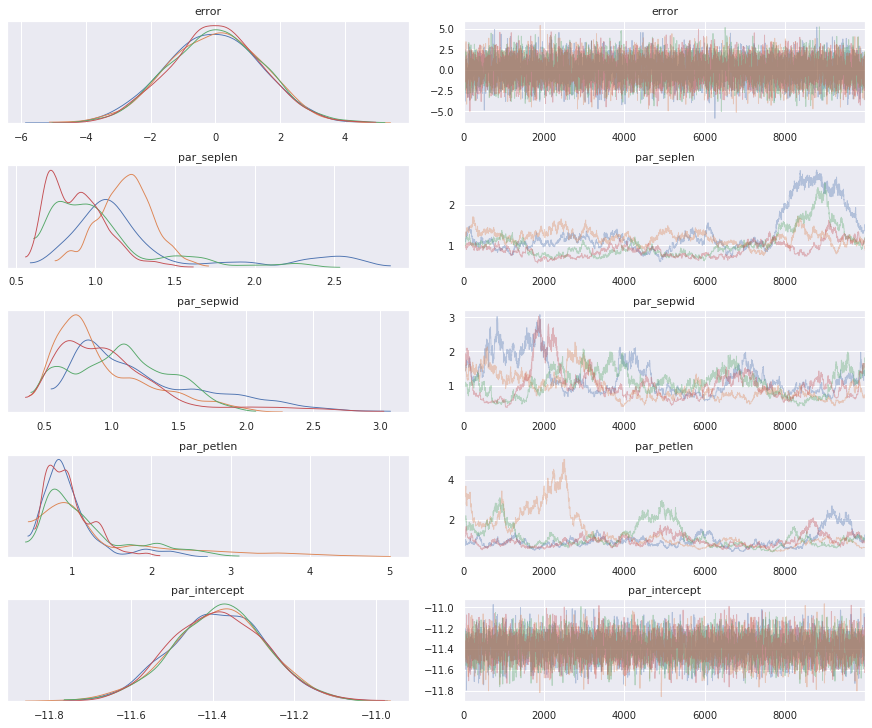

In [19]:
pm.traceplot(trace, var_names=["error", "par_seplen", "par_sepwid", "par_petlen", "par_intercept"])
plt.show()

We can see in the traceplot that the only parameters that reached convergence are the intercept and the error of the linear regression. The three parameters related to the features vary a lot. This can be due to a wrong decision when choosing the prior distributions. We have some exploratory data related to the features and we know that, in some of them, assuming normality is not well adjusted to the reality of the samples. Therefore, changing to other distributiones may help to reach convergence. Another explanation could be that some features are correlated, some transformation of the data may be useful to change this fact or modifying the model to a simpler version with less features to take into account for the prediction.

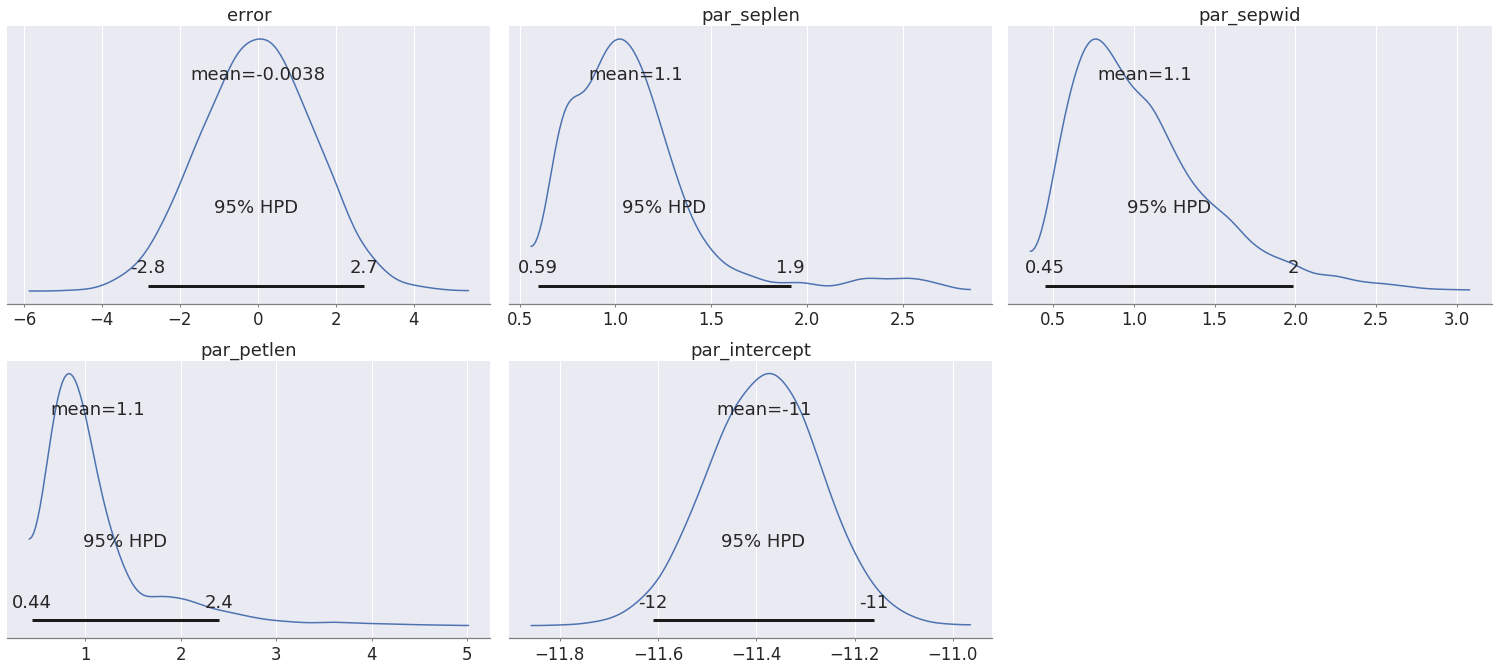

In [20]:
pm.plot_posterior(trace, credible_interval=0.95,
                  var_names=["error", "par_seplen", "par_sepwid", "par_petlen", "par_intercept"])
plt.show()

In [21]:
pm.summary(trace, var_names=["error", "par_seplen", "par_sepwid", "par_petlen", "par_intercept"])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
error,-0.004,1.437,-2.663,2.691,0.016,0.011,8401.0,7865.0,8414.0,8814.0,1.00
par_seplen,1.106,0.375,0.594,1.727,0.108,0.078,12.0,12.0,11.0,19.0,1.28
par_sepwid,1.068,0.439,0.451,1.919,0.072,0.051,37.0,37.0,43.0,48.0,1.12
par_petlen,1.127,0.605,0.445,2.281,0.172,0.125,12.0,12.0,16.0,34.0,1.21
par_intercept,-11.384,0.115,-11.601,-11.171,0.001,0.001,7451.0,7449.0,7455.0,7531.0,1.00


About the posterior distributions, we observe strange tails in some distributions that may support the idea of picking wrong priors for the features. Also, the HPD intervals are very broad, which is indicative of low confidence in the MAP values. If we compare these values with the ones obtained with LSE, we do not see any similarity. Also, most of the estimates that were given with LSE do not fall in the 95% HPD of our Bayesian model.

In conclusion, this modelling did not work well. If we did not have to use the three features since the beginning, as indicated, we could have used the information from the exploratory data analysis to decide which features to include in the model andto make better decisions about our prior distributions. Also, some scaling on the data may have been useful to improve the results.

### 3) Clusterize the plants according to its features and analyse the results of the clusters as indication of the type of plant.

Clustering is an unsupervised machine learning problem in which a set of data is divided in differentiated groups that contain more similar samples between them than the ones in other groups, without labeling the clusters. The simplest algorithm for clustering is **k-means**. This technique needs a number of clusters as input in order to decide the best clustering. Each group is centered in the mean of values that belong to that cluster and each value will be closer to its cluster centroid than to other clusters.

We use the `KMeans` function from `sklearn` to perform this task. First, we should consider the **scale** in each feature. Sometimes, it is a good idea to transform the values to logarithmic scale in order to highlight the differences between them. However, in this case all the variables are between 0 and 8 centimetres, so this transformation is not needed, and we will use a linear scale.

Next, we have to think about the **number of clusters** we will choose. For that, we will use one of the properties of the algorithm. K-means tries to minimise the within-cluster sum of squares (i.e. variance). So, we can calculate it for a range of group numbers and choose a value that is a compromise between the number of groups and their variance.

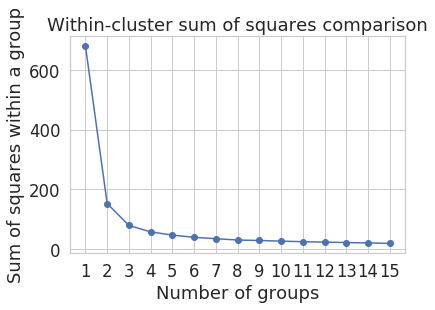

In [215]:
# Rename columns
all_iris.columns = ["seplen", "sepwid", "petlen", "petwid", "target", "type"]
# Function to run k-means for a number of centroids from 1 to k and plot
# a graph to compare the within-cluster sum of squares
def centroids(data, k):
    """Returns a plot with the comparison of within-cluster sum of squares"""
    ss = []
    for i in range(1, k+1):
        kmeans = KMeans(n_clusters=i)
        y_kmeans = kmeans.fit(data)
        ss.append(kmeans.inertia_)
    plt.plot(range(1, k+1), ss, "-o")
    plt.xticks(np.arange(1, k+1, 1.0))
    plt.title("Within-cluster sum of squares comparison")
    plt.xlabel("Number of groups")
    plt.ylabel("Sum of squares within a group")
    plt.show()
    return(ss)

# Execute function for k = 15
test = centroids(iris.iloc[:, 0:4], 15)

A k value between 3 and 4 seems to be a good value, as neither the variance nor the number of groups are too large. We will select a value of 3, because the change in the slope of the graph line is stronger between 2 and 3 than between 3 and 4. This rule is colloquially known as the "elbow method".

Now, we will run the k-means algorithm and plot the results. We will make different graphs, as we have 4 dimensions in our data, to have a better idea of the quality of the clustering, based on the real labels.

In [121]:
# K-means
kmeans = KMeans(n_clusters=3, random_state=1234)
y_kmeans = kmeans.fit_predict(iris)

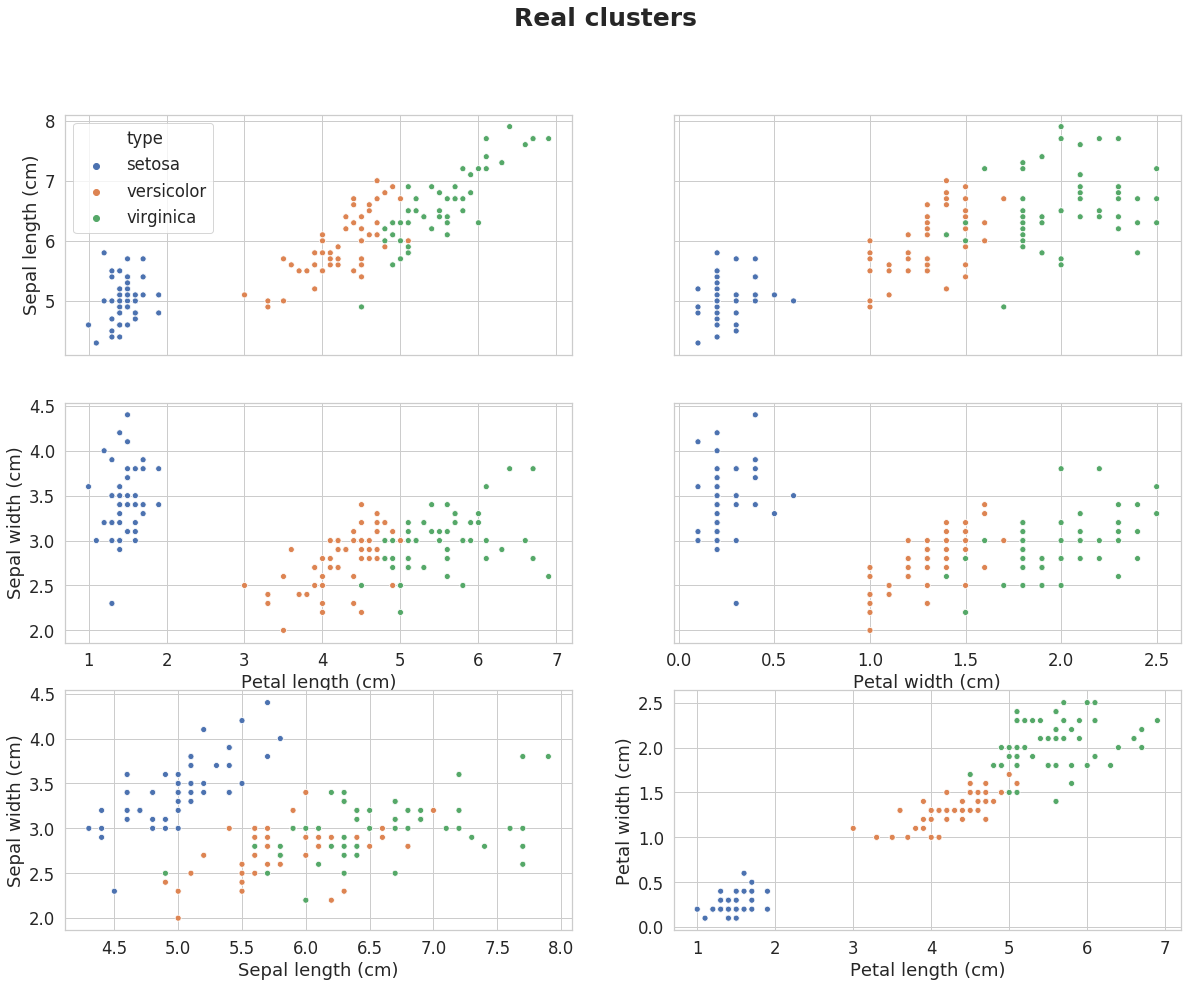

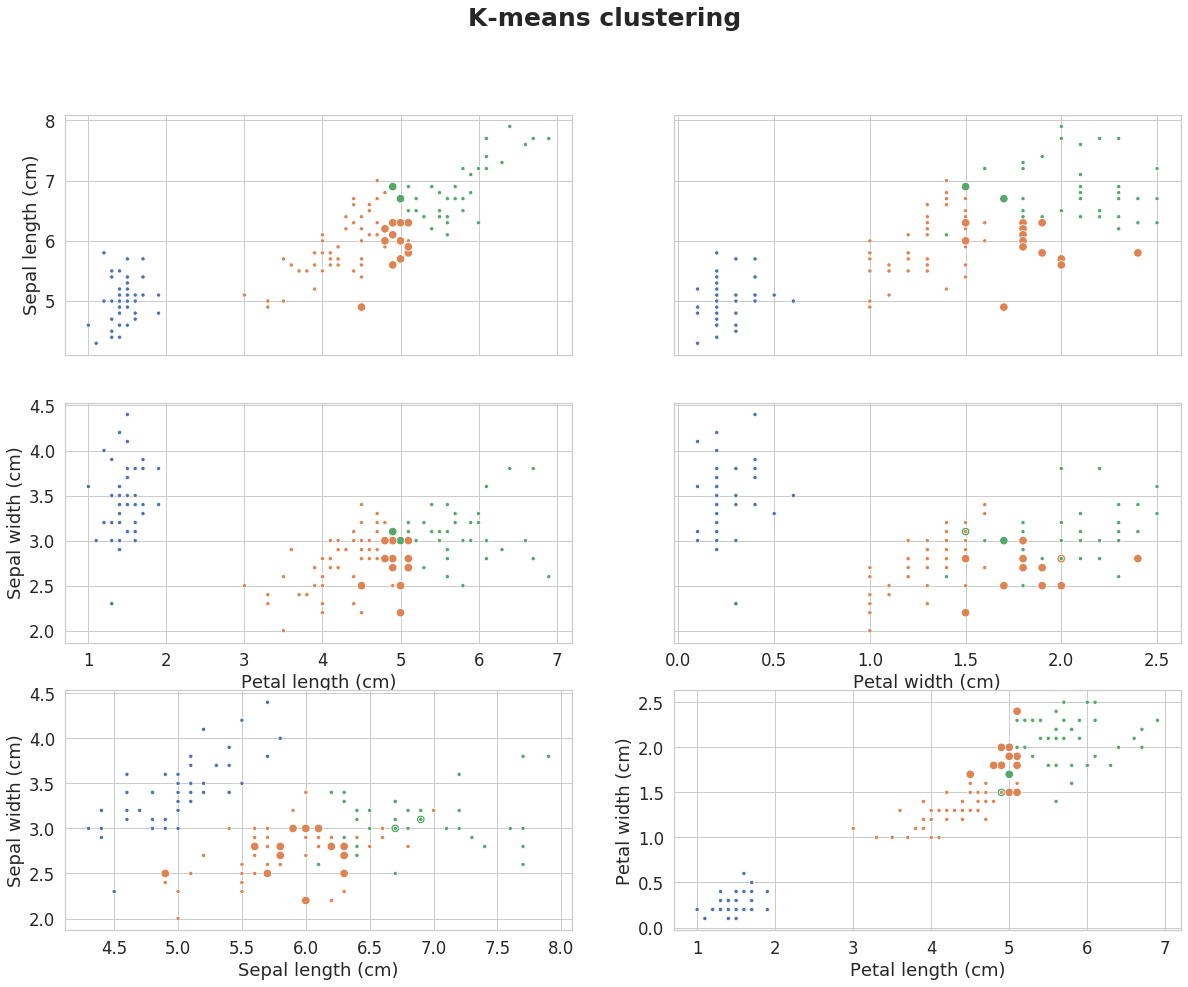

In [216]:
# Create data for plotting
km_iris = all_iris
km_iris["km"] = y_kmeans
km_iris["concordance"] = np.where(km_iris["target"] == km_iris["km"], 1, 0)
# Plot the real clusters
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.scatterplot("petlen", "seplen", hue="type", data=km_iris, ax=axs[0, 0])
axs[0, 0].axes.get_xaxis().set_ticklabels([])
axs[0, 0].axes.set_xlabel(None)
axs[0, 0].axes.set_ylabel("Sepal length (cm)")

sns.scatterplot("petwid", "seplen", hue="type", data=km_iris, legend=False, ax=axs[0, 1])
axs[0, 1].axes.get_xaxis().set_ticklabels([])
axs[0, 1].axes.set_xlabel(None)
axs[0, 1].axes.get_yaxis().set_ticklabels([])
axs[0, 1].axes.set_ylabel(None)

sns.scatterplot("petlen", "sepwid", hue="type", data=km_iris, legend=False, ax=axs[1, 0])
axs[1, 0].axes.set_xlabel("Petal length (cm)")
axs[1, 0].axes.set_ylabel("Sepal width (cm)")

sns.scatterplot("petwid", "sepwid", hue="type", data=km_iris, legend=False, ax=axs[1, 1])
axs[1, 1].axes.get_yaxis().set_ticklabels([])
axs[1, 1].axes.set_xlabel("Petal width (cm)")
axs[1, 1].axes.set_ylabel(None)

sns.scatterplot("seplen", "sepwid", hue="type", data=km_iris, legend=False, ax=axs[2, 0])
axs[2, 0].axes.set_xlabel("Sepal length (cm)")
axs[2, 0].axes.set_ylabel("Sepal width (cm)")

sns.scatterplot("petlen", "petwid", hue="type", data=km_iris, legend=False, ax=axs[2, 1])
axs[2, 1].axes.set_xlabel("Petal length (cm)")
axs[2, 1].axes.set_ylabel("Petal width (cm)")

plt.suptitle("Real clusters", fontsize=25, fontweight="bold")
plt.show()
# Plot the results
fig, axs = plt.subplots(3, 2, figsize=(20, 15))
sns.scatterplot("petlen", "seplen", hue="km", size="concordance", data=km_iris,
                legend=False, palette=["C0", "C1", "C2"], ax=axs[0, 0])
axs[0, 0].axes.get_xaxis().set_ticklabels([])
axs[0, 0].axes.set_xlabel(None)
axs[0, 0].axes.set_ylabel("Sepal length (cm)")

sns.scatterplot("petwid", "seplen", hue="km", size="concordance", data=km_iris,
                legend=False, palette=["C0", "C1", "C2"], ax=axs[0, 1])
axs[0, 1].axes.get_xaxis().set_ticklabels([])
axs[0, 1].axes.set_xlabel(None)
axs[0, 1].axes.get_yaxis().set_ticklabels([])
axs[0, 1].axes.set_ylabel(None)

sns.scatterplot("petlen", "sepwid", hue="km", size="concordance", data=km_iris,
                legend=False, palette=["C0", "C1", "C2"], ax=axs[1, 0])
axs[1, 0].axes.set_xlabel("Petal length (cm)")
axs[1, 0].axes.set_ylabel("Sepal width (cm)")

sns.scatterplot("petwid", "sepwid", hue="km", size="concordance", data=km_iris,
                legend=False, palette=["C0", "C1", "C2"], ax=axs[1, 1])
axs[1, 1].axes.get_yaxis().set_ticklabels([])
axs[1, 1].axes.set_xlabel("Petal width (cm)")
axs[1, 1].axes.set_ylabel(None)

sns.scatterplot("seplen", "sepwid", hue="km", size="concordance", data=km_iris,
                legend=False, palette=["C0", "C1", "C2"], ax=axs[2, 0])
axs[2, 0].axes.set_xlabel("Sepal length (cm)")
axs[2, 0].axes.set_ylabel("Sepal width (cm)")

sns.scatterplot("petlen", "petwid", hue="km", size="concordance", data=km_iris,
                legend=False, palette=["C0", "C1", "C2"], ax=axs[2, 1])
axs[2, 1].axes.set_xlabel("Petal length (cm)")
axs[2, 1].axes.set_ylabel("Petal width (cm)")

plt.suptitle("K-means clustering", fontsize=25, fontweight="bold")
plt.show()

We can visually see that most of the clusters are similar to the real ones and that 3 is a good value for k, in this case. We have plotted with a bigger size the points that have been assigned to a different group with k-means, so we can see that these values are in the limits of the Versicolor and Virginica clusters. This indicates that these groups cannot be well separated by this method and that the samples in these groups are very similar in their features. Finally, we can also conclude that the petal features define the groups better than the sepal features.

Finally, to quantitatively assess the **performance of the k-means algorithm**, we will use a confusion matrix, with the available function in the `sklearn` package. We will also use the `classification_report` function. Note that this is not usually possible in clustering techniques, as the labels of the data are not generally available to check a correct assignment of the samples to a given group. These tools are applied generally to classification algorithms.

In [160]:
conmat = confusion_matrix(km_iris["target"], km_iris["km"], normalize="all")
print(conmat)

[[0.33333333 0.         0.        ]
 [0.         0.32       0.01333333]
 [0.         0.09333333 0.24      ]]


In [153]:
clasrep = classification_report(km_iris["target"], km_iris["km"],
                                target_names=["Setosa", "Versicolor", "Virginica"])
print(clasrep)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       0.77      0.96      0.86        50
   Virginica       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



About the confusion matrix, we can see that all samples from the Setosa group have been correctly assigned (33% of the total). The Versicolor group also has a high proportion of correctly classified samples (32%), while the Virginica group is the less succesfully classified (24%). We can conclude that the Versicolor and Virginica group are very similar and hard to distinguish with this algorithm.

About the classification report, we can confirm the observations from the confusion matrix.

- The **recall** corresponds to the information that we mentioned in the confusion matrix explanation, the proportion of samples in a group correctly classified in that group.
- The **precision** is the proportion of correctly classified samples in a group related to all the samples classified in that group. The precision is almost perfect for the Setosa and Virginica groups, but lower for the Versicolor. This is because there are a lot of false positives in that group. 
- The **F1 score** mixes the precision and the recall to tell us the proportion of correct positive predictions for each group.
- The **accuracy**, which is the number of correct classifications for the whole prediction, is high (90%).

To sum up, k-means can be considered a good clustering method for these data. Taking advantage of the labels of this dataset, we have also checked that the classification in the real groups is very adequate, with an accuracy of around 90%.

### 4) Use a random forest classification and express which is the importance of each feature to infer the type of plant.

A **random forest** is a supervised machine learning algorithmn that can be used for both classification and regression tasks. It is an ensemble method, because it aggregates the results of an ensemble of simple estimators (in this case, decision trees).

To motivate the use of a random forest, we are going to explain **decision trees** first. A decision tree is an algorithm in which there are a series of questions that divide a set of data in order to classify or label them. Typically, each question makes a binary split on the data. Therefore, each split is made based on one feature of the data and, at each level, the groups are reassigned based on a majority vote of the points in them. Decision trees usually account for all the available features and are prone to overfitting when depth (number of splits) increases. Let's see how a decision tree on our data looks like:

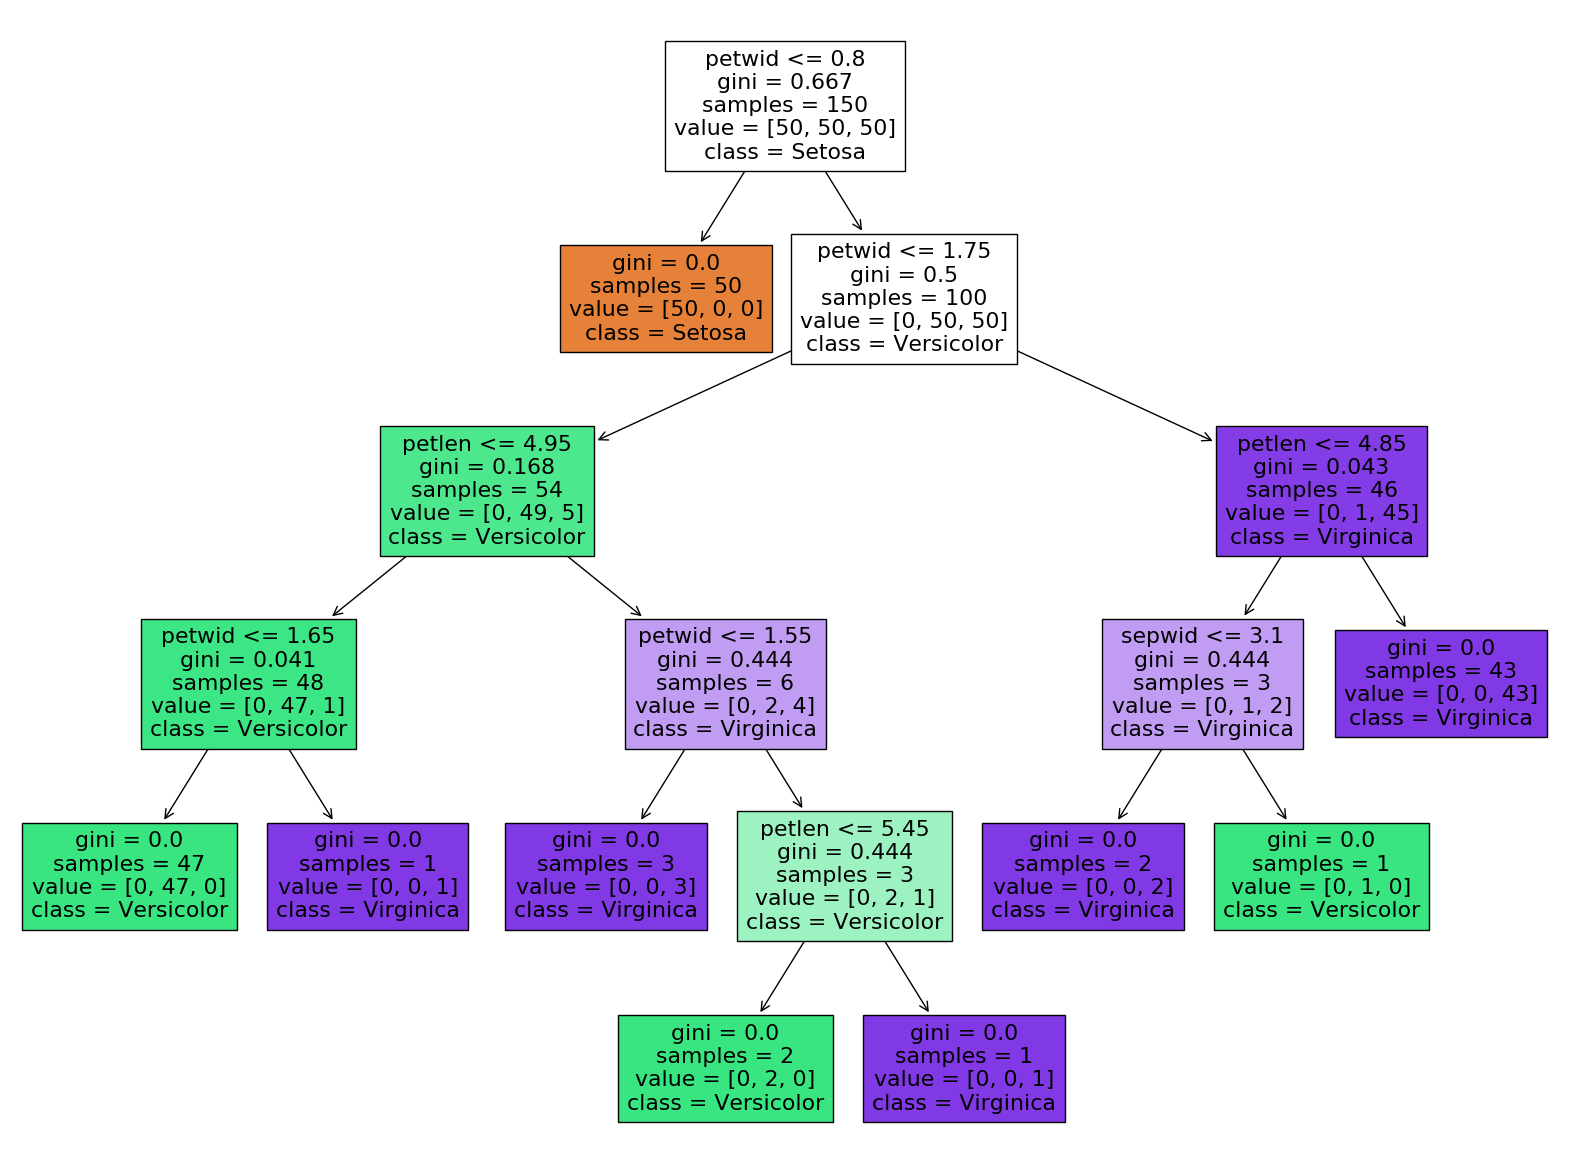

In [246]:
# Create decision tree
clf = DecisionTreeClassifier()
X, y = (all_iris.iloc[:, 0:4], all_iris["type"])
clf_fit = clf.fit(X, y)
dt_ftimp = clf.feature_importances_  # discussed at the end of the exercise
# Plotting
plt.style.use("default")
plt.figure(figsize=(20, 15))
plot_tree(clf_fit, feature_names=list(all_iris)[0:4],
          class_names=["Setosa", "Versicolor", "Virginica"], filled=True)
plt.show()

In this dataset, as we only have four features, the tree is not too big and we can easily follow the decision process. We can observe that only with the first two splits, we already get a good separation in the three categories of the data. In the first split, we separate the data from the Setosa group completely and, in the second split, we separate 49/50 samples from the Versicolor and 5/50 from the Virginica in the same group, and 1/50 from the Versicolor and 45/50 from the Virginica in the other group. When we look at the bottom leaves, we see that a small amount of samples remain being further classified. This is an evidence that supports our previous comment on the overfitting of decision trees.

As a side note, the Gini index that appears in the tree is a measurement of the impurity in the classification.

In order to compare a single decison tree with the random forest in terms of accuracy, we are going to split the data in training and test, and run it again.

In [247]:
# Split data in training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Fit training set to decision tree
clf_fit = clf.fit(X_train, y_train)
# Mean accuracy
clf.score(X_test, y_test)

0.9777777777777777

In [248]:
# Confusion matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred, normalize="all")

array([[0.35555556, 0.        , 0.        ],
       [0.        , 0.37777778, 0.02222222],
       [0.        , 0.        , 0.24444444]])

In [249]:
# Classification report
clasrep = classification_report(y_test, y_pred,
                                target_names=["Setosa", "Versicolor", "Virginica"])
print(clasrep)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      0.94      0.97        18
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Random forest classifiers use this kind of trees to build a robust algorithm. In particular, they use an ensemble of randomized decision trees. By randomized we mean that the trees come from randomly subsetting of the data. There are several strategies to do that, but we will comment on the `RandomForestClassifier` function from `sklearn`, which we will use next. This function randomizes the trees by sampling with replacement (bootstrap resampling) and it uses by default a random subset of features, normally the square root of the total number of them. With this strategy, we obtain a huge variety of trees that cover many possible configurations. Finally, the algorithm does not use a majority vote, as in a single decision tree, but it averages the probabilistic prediction for each individual tree. An advantage of using this kind of sampling is that we can compute the out-of-the-bag accuracy, which is a measurement of the accuracy using the data that has not been used to build a given tree.

Let's build our **Random Forest Classifier**. Using the default parameters from the function, it will build 100 trees with a depth as large as the leaves contain 1 sample, and the maximum number of features will be square root of the number of features in the dataset (so, 2 features).

In [260]:
# Build random forest
clf = RandomForestClassifier(random_state=0, oob_score=True)
clf.fit(all_iris.iloc[:, 0:4], all_iris["type"])
rf_ftimp = clf.feature_importances_  # discussed at the end of the exercise
clf.oob_score_

0.9533333333333334

We can observe a **high out-of-the-bag accuracy** with this algorithm, higher than 95%. To look further into this, we can obtain a confusion matrix and a classification report, using the same data split as before.

In [243]:
# Mean accuracy
clf.score(X_test, y_test)

1.0

In [244]:
# Confusion matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred, normalize="all")

array([[0.35555556, 0.        , 0.        ],
       [0.        , 0.4       , 0.        ],
       [0.        , 0.        , 0.24444444]])

In [245]:
# Classification report
clasrep = classification_report(y_test, y_pred,
                                target_names=["Setosa", "Versicolor", "Virginica"])
print(clasrep)

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       1.00      1.00      1.00        18
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



It is clear that we get better results (apparently, a perfect classifier for this data) with the random forest. However, it is worth mentioning that the out-of-the-bag accuracy is not 100%, so it is different from the mean accuracy that we obtain using the `score` method and the test subset. This makes sense, as the former is obtained from a group of test subsets (one for each of the trees in the forest, using the samples that were not included in the boostrap sampling) and the latter is a single estimate. In this case, the mean accuracy is a biased estimate and we should use the out-of-the-bag accuracy to compare different algorithms.

The **importance of each feature** is automatically computed by the classifier and can be obtained with the `feature_importances_` method, as we have done before. This method computes the feature importance based on the gini index (impurity). Feature importance can also be measured with a permutation procedure, useful in cases where the data has high cardinality (which is not our case, because the features are all quantitative and not categorical). 

In [259]:
ftimp = pd.DataFrame(data=[dt_ftimp, rf_ftimp], columns=list(all_iris)[0:4],
                    index=["Decision Tree", "Random Forest"])
ftimp

,seplen,sepwid,petlen,petwid
Decision Tree,0.000000,0.013333,0.064056,0.922611
Random Forest,0.090908,0.024531,0.460445,0.424116


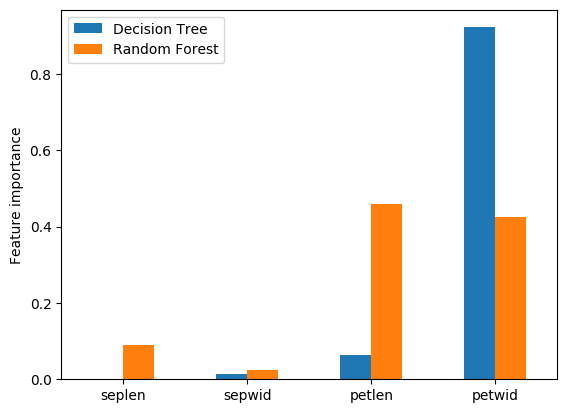

In [270]:
# Plot feature importances
ftimp.transpose().plot.bar(rot=0)
plt.ylabel("Feature importance")
plt.show()

We observe that a single decision tree with all the data and all the features base most of the classification on the petal width feature (92% of importance). When we take into account a wide number of trees, with different features and bootstrapped samples, the importance is divided between the petal length (46%) and the petal width (42%). Of course, we would take the values from the random forest if we had to decide which feature is the most important in determining the type of plant, because the sampling space is much bigger and the estimates are again less biased for the random forest.

In conclusion, decision trees are conceptually easy to understand and affordable for small datasets. But they get big and overfitted very often. Random forests take the advantages of decision trees adding a beneficial stochasticity that leads to less overfitted algorithms and better predictions in most of the cases.

### 5) Analyze the dependence (or independence) of each one of the features within the data set.

Two variables are said to be dependent when they vary together. For example, if variable A increases, variable B does too. If variable A decreases, variable B does too. This is an example of positive correlation (both variables vary in the same direction). There is also negative correlation, which happens when the two variables vary in the same proportion, but opposite directions. The mathematical measurement of dependence is the **correlation coefficient**. The most widely used is Pearson's correlation coefficient, which is essentially a scaled covariance. As this is a scaled value, it ranges from -1 to 1. A correlation value close to 0 means independence of the variables.

Pearson's correlation coefficient assumes that the compared variables have a linear relationship and are normally distributed. This is not the case for most of our variables, especially the petal measurements. Therefore, we are going to calculate the Pearson's coefficients first assuming normality and, then, using ranks.

In Python, it is very easy to calculate correlation coefficients in a dataframe, using the `corr` method:

In [286]:
# Correlation matrix
data = all_iris.iloc[:, 0:4]
corr = data.corr()
corr

,seplen,sepwid,petlen,petwid
seplen,1.000000,-0.117570,0.871754,0.817941
sepwid,-0.117570,1.000000,-0.428440,-0.366126
petlen,0.871754,-0.428440,1.000000,0.962865
petwid,0.817941,-0.366126,0.962865,1.000000


We can plot these correlation coefficients in a heatmap, so it is easier to interpret. We will also plot the squares with different size related to the strenght of the correlation.

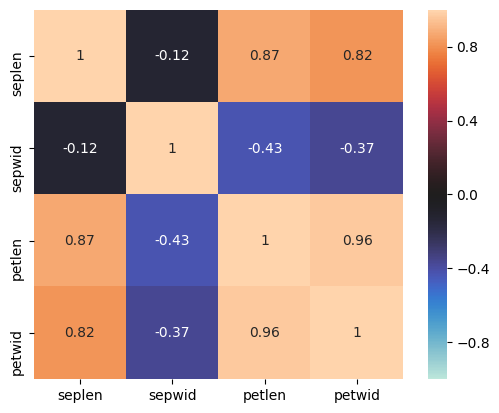

In [300]:
# Heatmap
sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot=True)
plt.show()

Now, let's do the same calculations, but using the **Spearman rank correlation** coefficients.

In [298]:
# Rank correlation matrix
rcorr = data.corr("spearman")
rcorr

,seplen,sepwid,petlen,petwid
seplen,1.000000,-0.166778,0.881898,0.834289
sepwid,-0.166778,1.000000,-0.309635,-0.289032
petlen,0.881898,-0.309635,1.000000,0.937667
petwid,0.834289,-0.289032,0.937667,1.000000


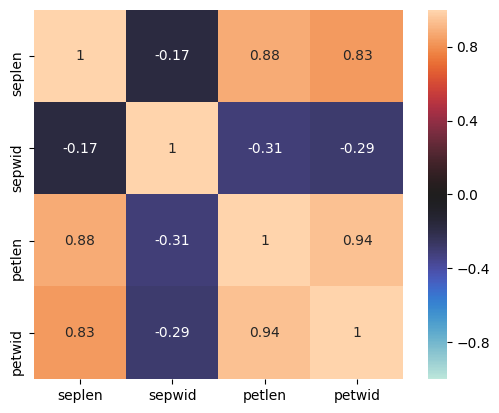

In [301]:
# Heatmap
sns.heatmap(rcorr, vmin=-1, vmax=1, center=0, square=True, annot=True)
plt.show()

From the Pearson correlation coefficients, we can see that the most independent variables are the sepal length and width (-0.12). Next, petal and sepal width have low correlation as well (-0.37 close to the correlation coefficient for petal length and sepal width (-0.43). The other correlation coefficients are too high to assume any independence among those variables.

When we compare these values with the rank Spearman coefficients, we can see that the values increase for the sepal features, but they decrease for the petal variables. However, the ordering of independence stays the same. This can be a sign to consider that sepal features are more normally distributed than the petal features. Correcting this fact using a rank correlation coefficient is a good idea, as we saw in the first exercise that some parameteres have groups of samples that skewed the distributions and break the normality of the data.

### 6) If we assign the following numerical values: Setosa=0, Versicolour=1, and Virginica=2 and we propose the following causal model:
### Sepal Length -> Sepal Width -> Plant Type <- Petal Width <- Petal Length
### a) Which relation of independence we should expect between Sepal Length and Petal Length? Check it.

In the proposed causal model, we have five variables and four edges. This is a **directed causal model**, as we have direction on the edges that trace a sequence of vertices to be traversed. If we cannot find a path between two variables following the direction of the edges, we can say that these two variables are causally independent. Therefore, for this basic reason, sepal length and petal length, as they are in the extremes of the graph and the edges do not allow to traverse a path between them, we can say that they are independent. In fact, there is a collider (Plant type) in the middle. Colliders, when they are unconditionated, do not allow the transmission of causal effects. So, this is another evidence of the independence of these two variables.

To formally check this, we have to compute the d-separation of these variables. The first step is to transform the directed graph in a matrix. 

In [ ]:
# DAG in matrix form
graph = [
    [False, True, False, False, False],
    [False, False, True, False, False],
    [False, False, False, False, False],
    [False, False, True, False, False],
    [False, False, False, True, False],
]

### b) And if we condition on Plant type?

Following the explanation of the previous example, given that Plant type is a collider, if we condition on this variable (vertex), we activate it and then the  causal effect is the opposite. Therefore, in this case, sepal length and petal length would have a dependence relation.

In [ ]:
# Code to check

### c) And if we condition on Petal Width?

Finally, if we condition on Petal Width, which is a non-collider, it would change to an inactive state. Therefore this causal path would be blocked and the sepal length and petal length variables would be independent again, as there would no be any transvarsabel path between them.

In [ ]:
# Code to check

**NOTE:** I was not capable of doing the part of checking the relations of independence. There is not any code missing.